# Pemanfaatan Model Machine Learning untuk Mendukung Keputusan Harga Rumah oleh Agen Properti

## 1. Business Understanding
- Latar Belakang

    - Dalam industri properti, penentuan harga rumah yang akurat dan kompetitif merupakan faktor kunci dalam keberhasilan transaksi jual beli. Agen properti dituntut untuk memberikan estimasi harga yang tidak hanya realistis namun juga menarik bagi pasar, agar rumah cepat terjual tanpa mengorbankan nilai yang layak bagi pemiliknya. Namun, proses penentuan harga sering kali masih bergantung pada intuisi atau pengalaman pribadi agen, yang rentan terhadap bias dan kurang konsisten.
    
    - Agen properti selama ini mengandalkan pengalaman, intuisi, dan perbandingan harga dari properti sejenis di sekitarnya untuk menentukan harga jual rumah. Namun, pendekatan ini memiliki kelemahan signifikan—seperti subyektivitas, ketidakkonsistenan antar agen, dan ketidakmampuan dalam mengakomodasi kompleksitas data historis dan tren pasar secara menyeluruh.

    - Dengan meningkatnya volume data dan kemajuan teknologi informasi, hadirnya metode Machine Learning (ML) menawarkan solusi yang lebih efisien dan akurat. ML memungkinkan sistem untuk mempelajari pola dari data historis dan membuat prediksi berbasis statistik serta korelasi yang mungkin tidak tampak secara kasat mata oleh manusia.

- Tujuan Bisnis

    - Membangun model machine learning yang mampu memprediksi harga rumah secara akurat berdasarkan data historis dan fitur properti.

    - Mendukung pengambilan keputusan agen properti dalam menentukan harga rumah yang kompetitif dan sesuai dengan kondisi pasar.

    - Mengurangi subjektivitas dan ketidakkonsistenan dalam proses penetapan harga.

    - Meningkatkan kepercayaan dan profesionalisme agen properti, melalui penggunaan teknologi berbasis data.

    - Meningkatkan efisiensi waktu dan biaya dalam proses estimasi harga, terutama ketika menghadapi banyak properti dalam waktu singkat.

## 2. Data Understanding

Import Library

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import normaltest
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [130]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Deskripsi Kolom
| Kolom                          | Deskripsi                                                                  |
|--------------------------------|----------------------------------------------------------------------------|
| `Avg. Area Income`             | Rata-rata pendapatan tahunan penduduk di area tersebut (dalam satuan dolar AS).                                                             |
| `Avg. Area House Age`          | Rata-rata umur rumah yang ada di area tersebut (dalam tahun).               |
| `Avg. Area Number of Rooms`    | Rata-rata jumlah ruangan di rumah-rumah pada area tersebut.                 |
| ` Avg. Area Number of Bedrooms`| Rata-rata jumlah kamar tidur di rumah-rumah pada area tersebut.             |
| `Area Population`              | Jumlah total populasi atau penduduk yang tinggal di area tersebut.          |
| `Price`                        | Harga rumah yang menjadi target prediksi (dalam dolar AS).                  |
| `Adress`                       | Alamat dari rumah yang bersangkutan                                         |

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [132]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [135]:
df.drop(columns=['Address'], inplace=True)

## 3. EDA

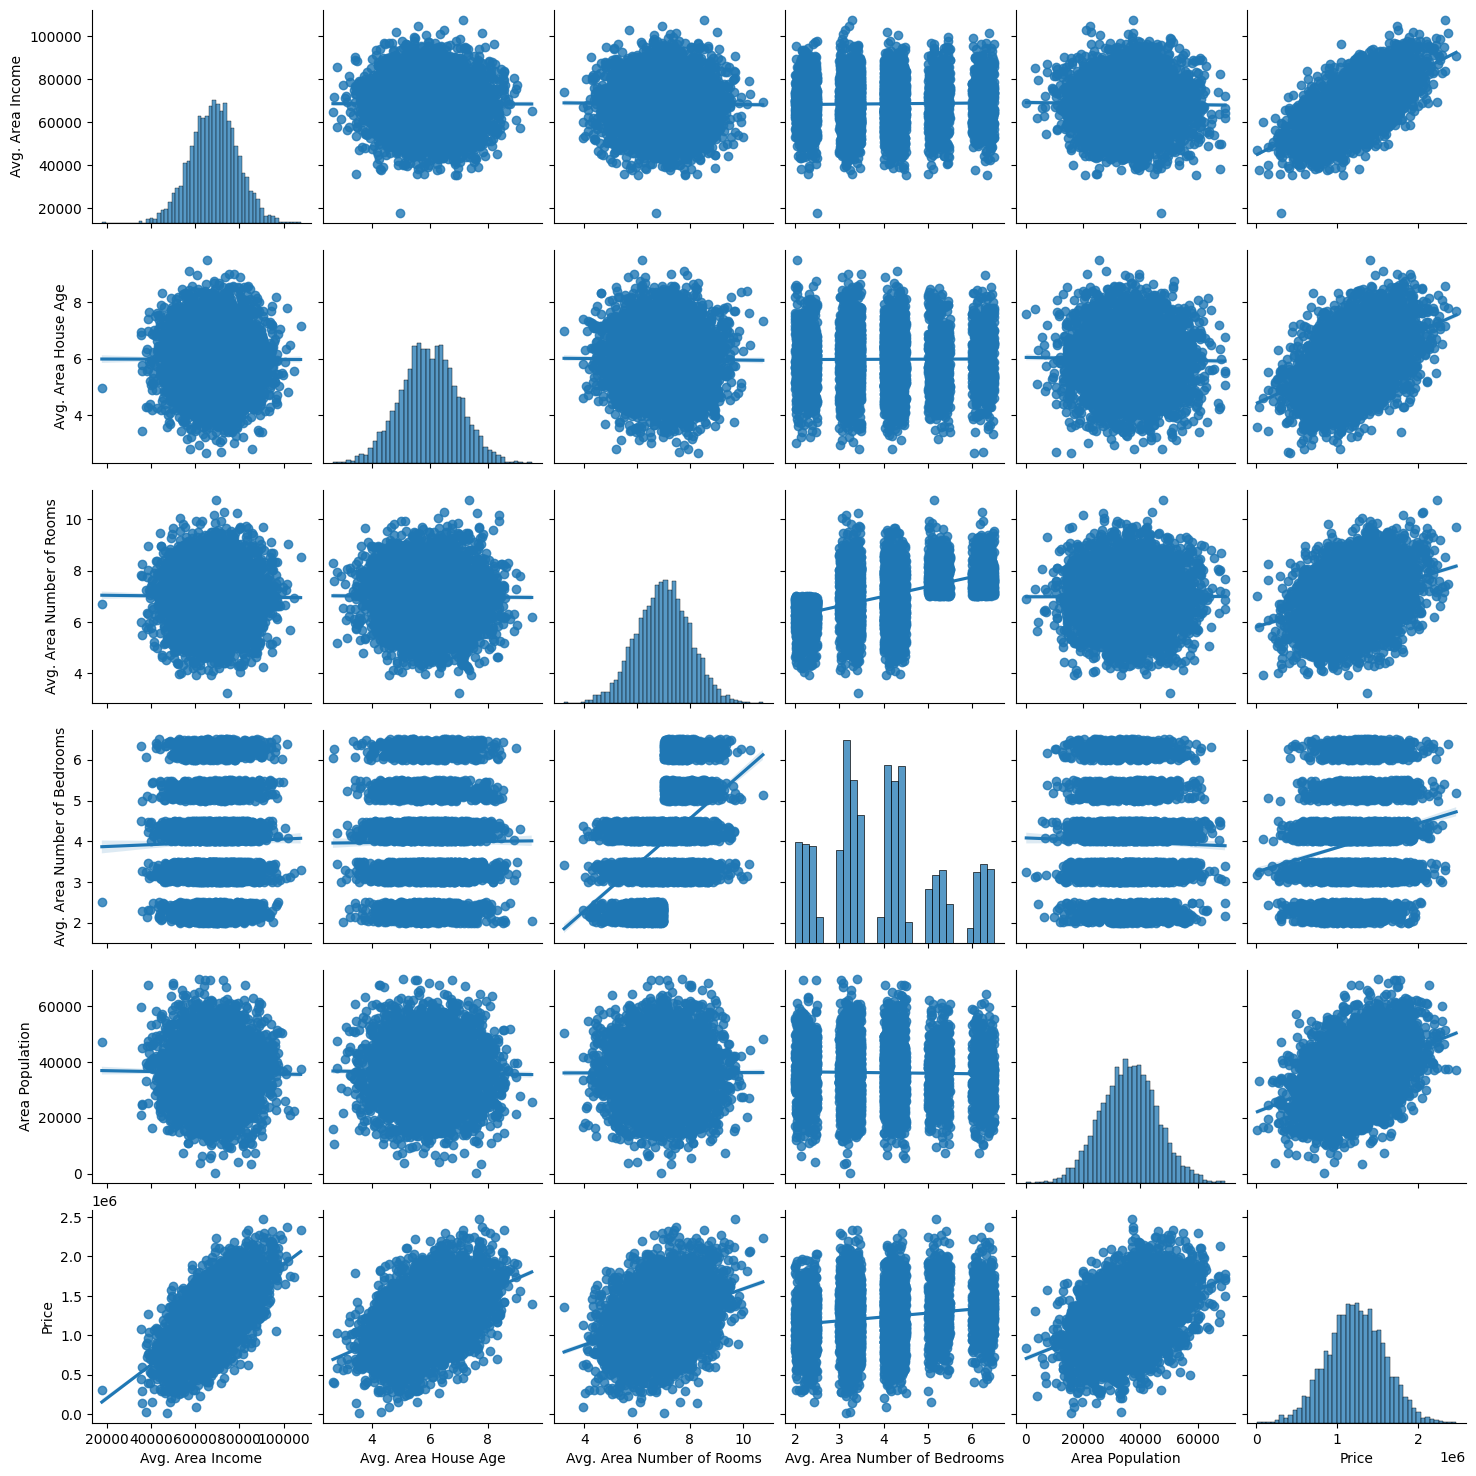

In [136]:
# pairplot
sns.pairplot(data=df, kind = 'reg');

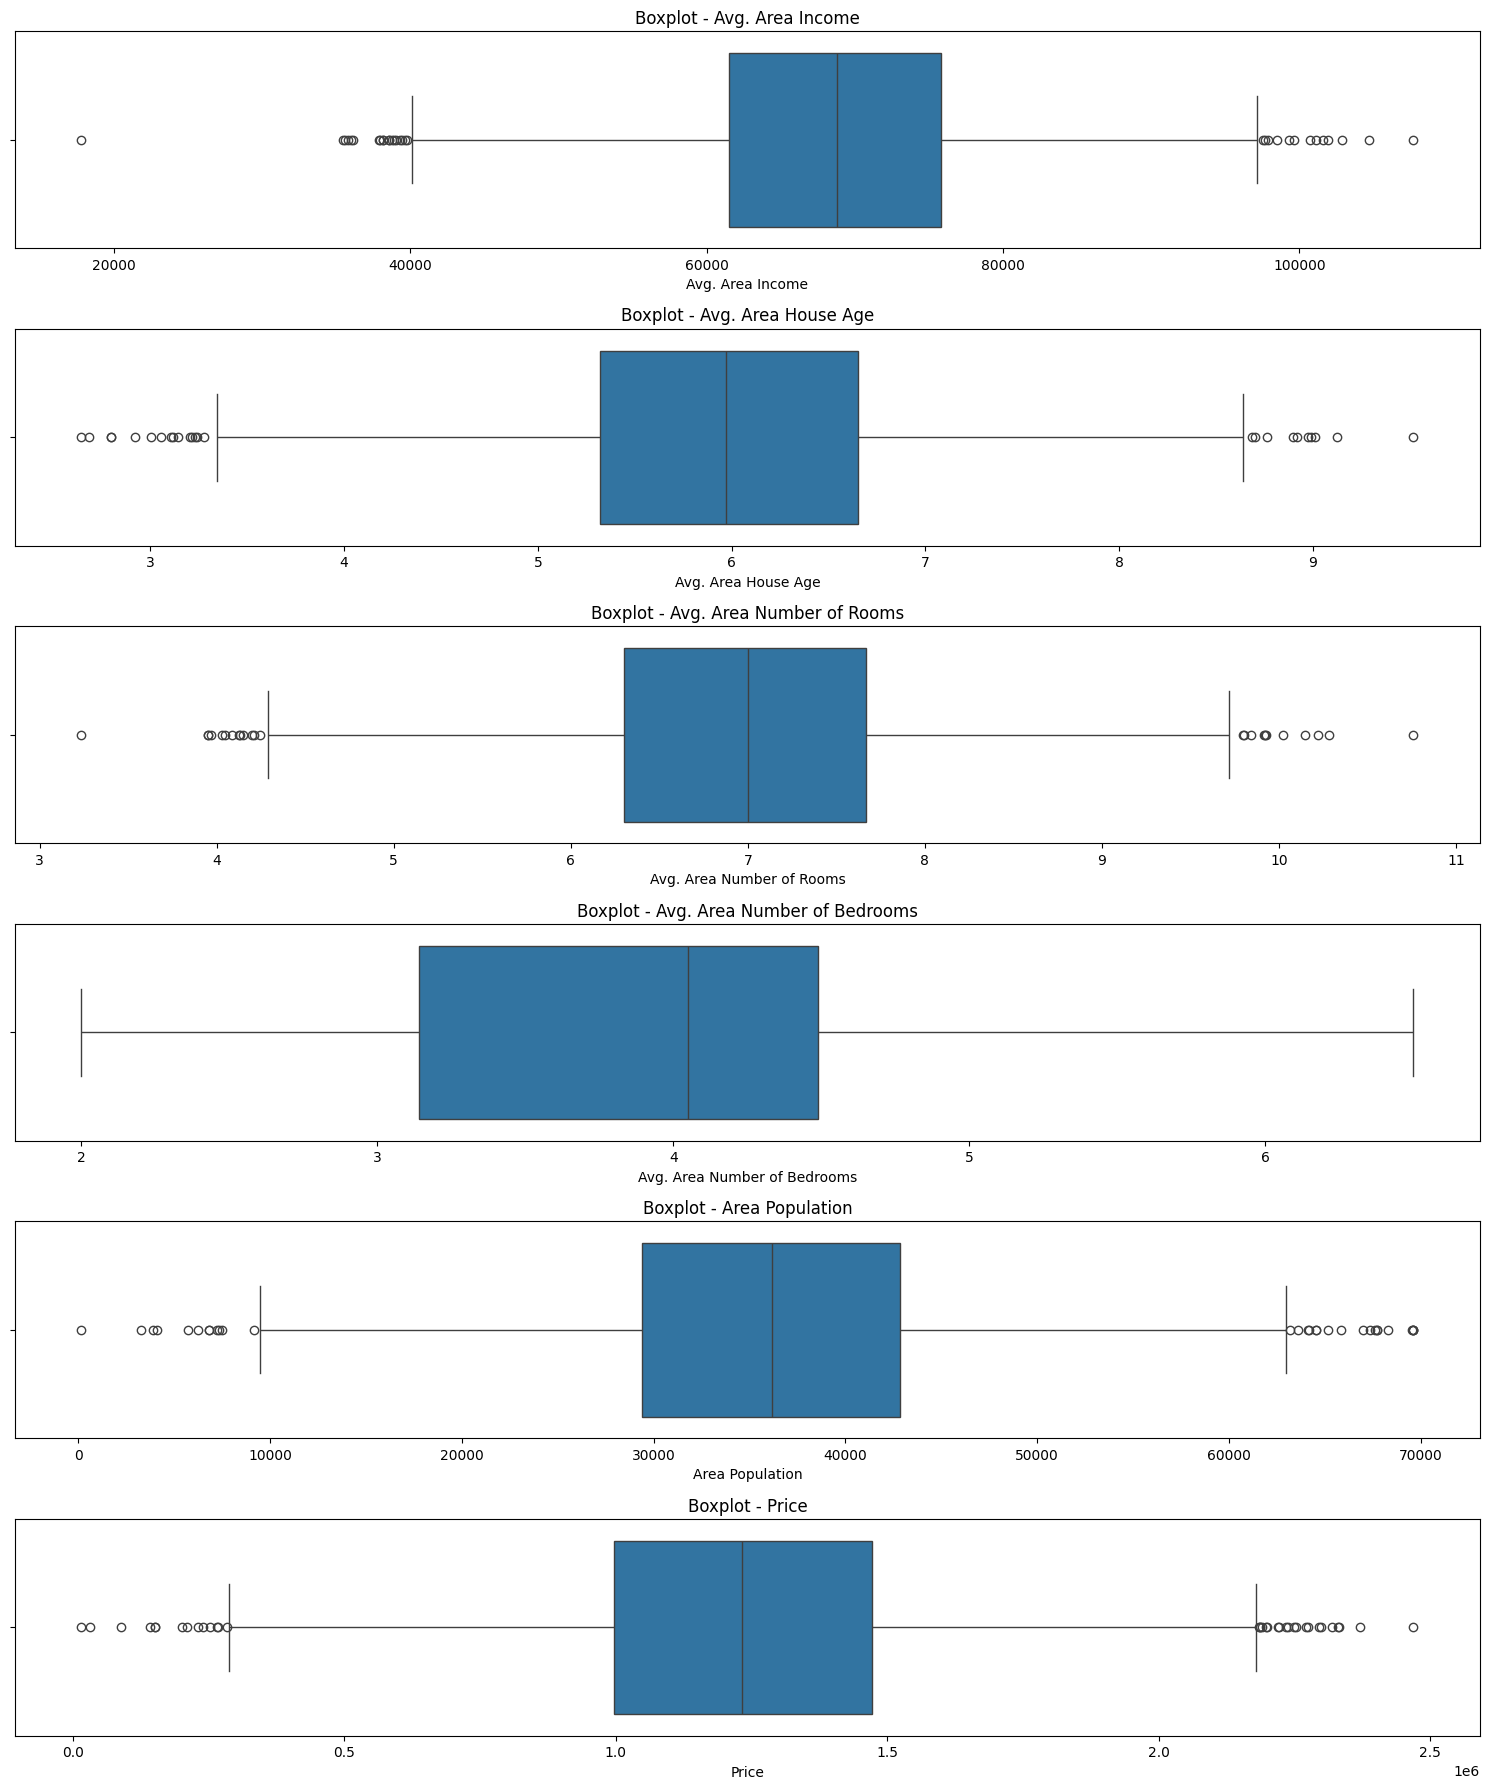

In [137]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['float64']).columns

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

<Axes: >

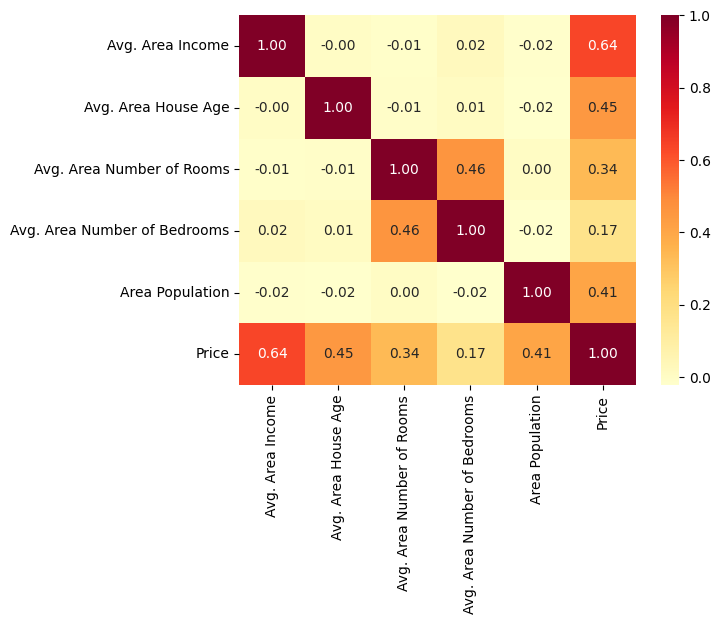

In [138]:
# heatmap
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd', fmt='.2f')

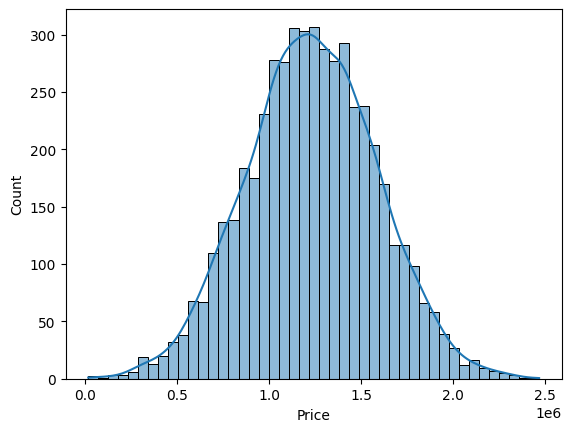

In [199]:
sns.histplot(df['Price'], kde=True);

## 4. Pre-Processing

In [140]:
X = df.drop(columns=['Price'])
X = sm.add_constant(X)
y = df['Price']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
def vif_calc(X_train):
    vif = pd.DataFrame()
    vif['kolom'] = X_train.columns
    vif['VIF']= [variance_inflation_factor(X,i) for i in range(len(X_train.columns))]
    vif['Acc']= np.where(vif['VIF']>10,'No','Yes')
    return vif
vif_calc(X_train)

,kolom,VIF,Acc
0,const,143.857530,No
1,Avg. Area Income,1.001159,Yes
2,Avg. Area House Age,1.000577,Yes
3,Avg. Area Number of Rooms,1.273535,Yes
4,Avg. Area Number of Bedrooms,1.274413,Yes
5,Area Population,1.001266,Yes


## 5. Modeling

### Benchmark Model

In [143]:
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()

In [144]:
num_features = ['const', 'Avg. Area Income', 'Avg. Area House Age', 
                'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                'Area Population']

In [145]:
preprocessor = ColumnTransformer([
    ('robust', RobustScaler(), num_features)
], remainder='passthrough')

In [146]:
models = [lin_reg, ridge, lasso, knn, decision_tree, random_forest, xgboost]

list_scorer = [
    'neg_mean_absolute_error',
    'neg_mean_squared_error',
    'neg_root_mean_squared_error',
    'neg_mean_absolute_percentage_error',
    'r2'
]

results = []

for i in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', i)
    ])

    scores = cross_validate(pipe, X_train, y_train, scoring=list_scorer, cv=5)
    
    results.append({
    'Model': i.__class__.__name__,
    'MAE': -scores['test_neg_mean_absolute_error'].mean(),
    'RMSE': -scores['test_neg_root_mean_squared_error'].mean(),
    'MAPE': -scores['test_neg_mean_absolute_percentage_error'].mean(),
    'R2': scores['test_r2'].mean()
    })

df_results = pd.DataFrame(results)
df_results

,Model,MAE,RMSE,MAPE,R2
0,LinearRegression,81600.718880,101443.549293,0.076901,0.917413
1,Ridge,81604.556515,101443.367335,0.076930,0.917413
2,Lasso,81600.694327,101443.544422,0.076901,0.917413
3,KNeighborsRegressor,104395.884154,131662.267443,0.111932,0.861155
4,DecisionTreeRegressor,140636.254204,178023.102410,0.143545,0.746170
5,RandomForestRegressor,96656.832359,121584.805589,0.100961,0.881583
6,XGBRegressor,98758.940229,123627.333802,0.098191,0.877483


Interpretasi dan Pemilihan Model:

- Linear Regression, Ridge, dan Lasso memberikan performa terbaik dan identik di semua metrik utama (MAE, RMSE, MAPE, dan R² sebesar 0.9174).

- Model non-linear seperti Decision Tree dan KNN menunjukkan performa yang lebih buruk secara signifikan, baik dari segi akurasi maupun stabilitas prediksi.

- Meskipun Random Forest dan XGBoost menunjukkan performa cukup baik, tingkat error-nya masih lebih tinggi dibandingkan Linear Regression, dan R²-nya lebih rendah.

### Linear Regression Menggunakan Statsmodels

In [147]:
# define model
model = sm.OLS(y, X)

# fitting
model = model.fit()

# summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        15:34:27   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Interpretasi:

- `Avg. Area Income` (21.5780)

    - Setiap kenaikan 1 dolar pada rata-rata pendapatan area akan meningkatkan harga rumah sebesar $21.58, dengan asumsi variabel lain tetap konstan.

- `Avg. Area House Age` (1.656e+05 / 165600)

    - Setiap tambahan 1 tahun usia rata-rata rumah di area tersebut meningkatkan harga rumah sebesar $165.600. Ini menunjukkan rumah di area dengan usia rumah lebih tua cenderung memiliki harga lebih tinggi.

- `Avg. Area Number of Rooms` (1.207e+05 / 120700)

    - Setiap tambahan 1 kamar rata-rata di area meningkatkan harga rumah sebesar $120.700, dengan variabel lain tetap.

- `Avg. Area Number of Bedrooms` (1651.1391)

    - Setiap tambahan 1 kamar tidur rata-rata meningkatkan harga rumah sebesar $1.651. Ini menunjukkan bahwa kamar tidur memiliki pengaruh positif, tetapi lebih kecil dibandingkan jumlah kamar total.

- `Area Population` (15.2007)

    - Setiap tambahan 1 orang dalam populasi area meningkatkan harga rumah sebesar $15.20. Ini menunjukkan bahwa area yang lebih padat mungkin memiliki nilai properti lebih tinggi, meskipun pengaruhnya kecil.

Note: kolom `Avg. Area Number of Bedrooms` tidak di drop karena secara bisnis tetap penting

### Linear Regression Menggunakan Sklearn

In [169]:
# define model
modelsk = LinearRegression()

# fitting
modelsk = modelsk.fit(X, y)

# prediction
price_pred = modelsk.predict(X)
price_pred

array([1223847.0427535 , 1494937.69161689, 1253016.7460817 , ...,
       1020482.52609294, 1263982.8245735 , 1301976.34571969],
      shape=(5000,))

## 6. Model Assumption

### a. Normality Residual

In [189]:
model.resid

0      -164813.484884
1        10953.223230
2      -194028.758205
3       139392.738979
4      -214445.276957
            ...      
4995       165.864140
4996     77338.792016
4997     10247.057060
4998    -65325.952166
4999     -3025.865453
Length: 5000, dtype: float64

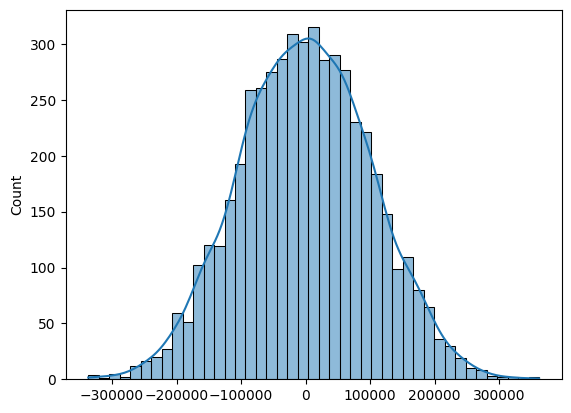

In [190]:
# hist
sns.histplot(model.resid, kde= True);

In [191]:
stat, p = normaltest(model.resid)

# Tampilkan hasil
print(f"Statistik uji: {stat:.4f}")
print(f"p-value: {p:.4f}")

# Interpretasi
if p < 0.05:
    print("Kesimpulan: Tolak H0 → Data residual tidak berdistribusi normal. Asumsi normalitas TIDAK terpenuhi.")
else:
    print("Kesimpulan: Gagal tolak H0 → Tidak cukup bukti untuk menyatakan bahwa residual tidak normal. Asumsi normalitas TERPENUHI ✅")

Statistik uji: 5.5798
p-value: 0.0614
Kesimpulan: Gagal tolak H0 → Tidak cukup bukti untuk menyatakan bahwa residual tidak normal. Asumsi normalitas TERPENUHI ✅


### b. Zero Mean of Residuals

In [192]:
residual_mean = model.resid.mean()
print(f"Rata-rata residual: {residual_mean}")

Rata-rata residual: 1.364387571811676e-09


Interpretasi:
- Nilai rata-rata residual = 1.36 × 10⁻9, sangat dekat dengan nol.

- Dalam konteks numerik dan toleransi komputasi, nilai ini dianggap nol secara praktis.

- ✅ Asumsi rata-rata residual = 0 terpenuhi, yang berarti model tidak bias secara sistematis dan memenuhi salah satu syarat Gauss-Markov.

### c. Linearity

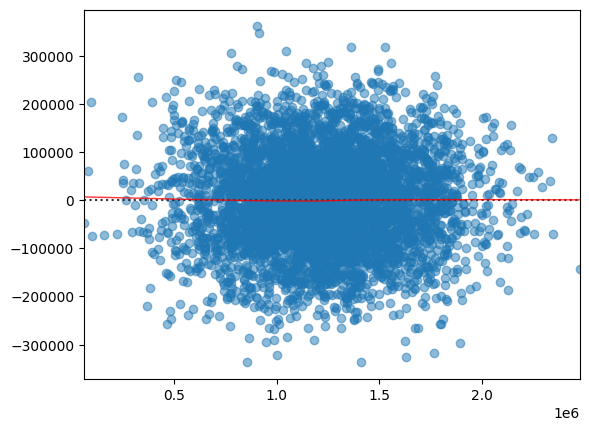

In [193]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(y = model.resid, x = model.fittedvalues,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

Interpretasi:

- Titik-titik residual tersebar acak dan simetris di sekitar garis horizontal (y = 0).

- Tidak terlihat pola melengkung atau sistematis yang menunjukkan hubungan non-linear.

- Garis LOWESS (merah) relatif datar dan mendekati sumbu horizontal.

Kesimpulan:

- ✅ Asumsi linearitas terpenuhi.

### d. Homoscedasticity

In [195]:
# Nama-nama hasil uji
labels = ['Lagrange multiplier statistic', 'LM p-value', 'F-statistic', 'F p-value']

# Uji Breusch-Pagan
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# Gabungkan nama dan hasil uji
bp_result = lzip(labels, bp_test)

# Tampilkan hasil
for label, value in bp_result:
    print(f"{label}: {value}")

Lagrange multiplier statistic: 10.314391763858733
LM p-value: 0.06680171168676086
F-statistic: 2.064662045387671
F p-value: 0.06676722826785124


Hipotesis:

- Hipotesis Nol (H₀): Varians residual konstan (tidak ada heteroskedastisitas).

- Hipotesis Alternatif (H₁): Varians residual tidak konstan (ada heteroskedastisitas).

Keputusan:

- Jika p-value < 0.05 → Tolak H₀ → Ada heteroskedastisitas (asumsi Gauss-Markov tidak terpenuhi).

- Jika p-value ≥ 0.05 → Gagal tolak H₀ → Tidak ada bukti heteroskedastisitas.

Hasil:

- ✅ Dengan nilai LM p-value 0.0668, diasumsikan bahwa model memenuhi asumsi homoskedastisitas (varians residual dianggap konstan secara statistik).

### e. Correlation Between Residuals and Prediction

In [196]:
# Menghitung korelasi Spearman antara residual dan nilai prediksi
spearman_corr = model.resid.corr(model.fittedvalues, method='spearman')

# Menampilkan hasil korelasi
print(f"Korelasi Spearman antara residual dan nilai prediksi: {spearman_corr:.6f}")

Korelasi Spearman antara residual dan nilai prediksi: 0.006068


Interpretasi:

- Nilai korelasi ≈ 0.006 sangat dekat dengan nol, menunjukkan bahwa tidak ada korelasi antara residual dan nilai prediksi.

- Ini berarti tidak ada pola sistematis yang tersisa dalam residual → mendukung asumsi independensi residual.

✅ Asumsi Gauss-Markov terkait tidak adanya autokorelasi residual dapat dianggap terpenuhi.

### f. No Autocorrelation of Residuals

In [197]:
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw_stat}")

Durbin-Watson: 2.0051042989427477


Interpretasi:

Nilai DW = 2.005 sangat dekat dengan 2, maka:

✅ Tidak terdapat autokorelasi pada residual.

✅ Ini berarti asumsi Gauss-Markov terkait autokorelasi terpenuhi

## 7. Model Evaluation

In [200]:
print(f"MAE  : {mean_absolute_error(y, price_pred):.2f}")
print(f"MSE  : {mean_squared_error(y, price_pred):.2f}")
print(f"RMSE : {root_mean_squared_error(y, price_pred):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y, price_pred):.4f}")
print(f"R²   : {r2_score(y, price_pred):.4f}")

MAE  : 81359.27
MSE  : 10219734313.25
RMSE : 101092.70
MAPE : 0.0762
R²   : 0.9180


Interpretasi:

- MAE (Mean Absolute Error): Rata-rata kesalahan prediksi sebesar ± Rp 81.359.

- MSE (Mean Squared Error): Kesalahan kuadrat rata-rata yang besar, digunakan sebagai dasar RMSE.

- RMSE (Root Mean Squared Error): Rata-rata deviasi prediksi dari nilai aktual adalah sekitar Rp 101.093.

- MAPE (Mean Absolute Percentage Error): Model membuat kesalahan rata-rata sekitar 7.62% dari nilai aktual

- R² (R-squared): Nilai 0.918 menunjukkan bahwa 91.8% variabilitas dalam data target dapat dijelaskan oleh model

## 8. Save Model

In [202]:
# Simpan
joblib.dump(model, 'model_house_prediction.joblib')

# Load
model_loaded = joblib.load('model_house_prediction.joblib')